<a href="https://colab.research.google.com/github/mnecmc/mnecmc/blob/main/Sales%20Prediction%20_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

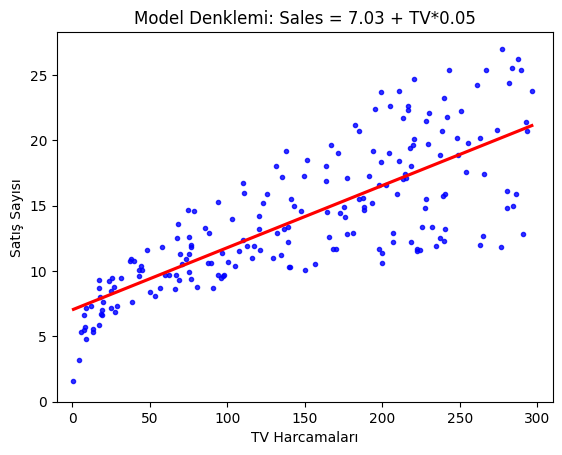

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Starting gradient descent at b = 0.001, w = 0.001, mse = 222.9477491673001
iter=0    b=0.01    w=0.3708    mse=53.25
After 100 iterations b = 0.2799086420031316, w = 0.47887043076599595, mse = 41.616316284097245


In [ ]:
# LINEAR REGRESSION

######################################################
# Sales Prediction with Linear Regression
######################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score


######################################################
# Simple Linear Regression with OLS Using Scikit-Learn
######################################################

df = pd.read_csv("advertising.csv")
df.shape

X = df[["TV"]]
y = df[["sales"]]


##########################
# Model
##########################

reg_model = LinearRegression().fit(X, y)

# y_hat = b + w*TV

# sabit (b - bias)
reg_model.intercept_[0]

# tv'nin katsayısı (w1)
reg_model.coef_[0][0]


##########################
# Tahmin
##########################

# 150 birimlik TV harcaması olsa ne kadar satış olması beklenir?

reg_model.intercept_[0] + reg_model.coef_[0][0]*150

# 500 birimlik tv harcaması olsa ne kadar satış olur?

reg_model.intercept_[0] + reg_model.coef_[0][0]*500

df.describe().T


# Modelin Görselleştirilmesi
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")

g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()


##########################
# Tahmin Başarısı
##########################

# MSE
y_pred = reg_model.predict(X)
mean_squared_error(y, y_pred)
# 10.51
y.mean()
y.std()

# RMSE
np.sqrt(mean_squared_error(y, y_pred))
# 3.24

# MAE
mean_absolute_error(y, y_pred)
# 2.54

# R-KARE
reg_model.score(X, y)


######################################################
# Multiple Linear Regression
######################################################

df = pd.read_csv("advertising.csv")

X = df.drop('sales', axis=1)

y = df[["sales"]]


##########################
# Model
##########################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

y_test.shape
y_train.shape

reg_model = LinearRegression().fit(X_train, y_train)

# sabit (b - bias)
reg_model.intercept_

# coefficients (w - weights)
reg_model.coef_


##########################
# Tahmin
##########################

# Aşağıdaki gözlem değerlerine göre satışın beklenen değeri nedir?

# TV: 30
# radio: 10
# newspaper: 40

# 2.90
# 0.0468431 , 0.17854434, 0.00258619

# Sales = 2.90  + TV * 0.04 + radio * 0.17 + newspaper * 0.002

2.90794702 + 30 * 0.0468431 + 10 * 0.17854434 + 40 * 0.00258619

yeni_veri = [[30], [10], [40]]
yeni_veri = pd.DataFrame(yeni_veri).T

reg_model.predict(yeni_veri)

##########################
# Tahmin Başarısını Değerlendirme
##########################

# Train RMSE
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))
# 1.73

# TRAIN RKARE
reg_model.score(X_train, y_train)

# Test RMSE
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))
# 1.41

# Test RKARE
reg_model.score(X_test, y_test)


# 10 Katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))

# 1.69


# 5 Katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=5,
                                 scoring="neg_mean_squared_error")))
# 1.71




######################################################
# Simple Linear Regression with Gradient Descent from Scratch
######################################################

# Cost function MSE
def cost_function(Y, b, w, X):
    m = len(Y)
    sse = 0

    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        sse += (y_hat - y) ** 2

    mse = sse / m
    return mse


# update_weights
def update_weights(Y, b, w, X, learning_rate):
    m = len(Y)
    b_deriv_sum = 0
    w_deriv_sum = 0
    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        b_deriv_sum += (y_hat - y)
        w_deriv_sum += (y_hat - y) * X[i]
    new_b = b - (learning_rate * 1 / m * b_deriv_sum)
    new_w = w - (learning_rate * 1 / m * w_deriv_sum)
    return new_b, new_w


# train fonksiyonu
def train(Y, initial_b, initial_w, X, learning_rate, num_iters):

    print("Starting gradient descent at b = {0}, w = {1}, mse = {2}".format(initial_b, initial_w,
                                                                   cost_function(Y, initial_b, initial_w, X)))

    b = initial_b
    w = initial_w
    cost_history = []

    for i in range(num_iters):
        b, w = update_weights(Y, b, w, X, learning_rate)
        mse = cost_function(Y, b, w, X)
        cost_history.append(mse)


        if i % 100 == 0:
            print("iter={:d}    b={:.2f}    w={:.4f}    mse={:.4}".format(i, b, w, mse))


    print("After {0} iterations b = {1}, w = {2}, mse = {3}".format(num_iters, b, w, cost_function(Y, b, w, X)))
    return cost_history, b, w


df = pd.read_csv("advertising.csv")

X = df["radio"]
Y = df["sales"]

# hyperparameters
learning_rate = 0.001
initial_b = 0.001
initial_w = 0.001
num_iters = 100

cost_history, b, w = train(Y, initial_b, initial_w, X, learning_rate, num_iters)


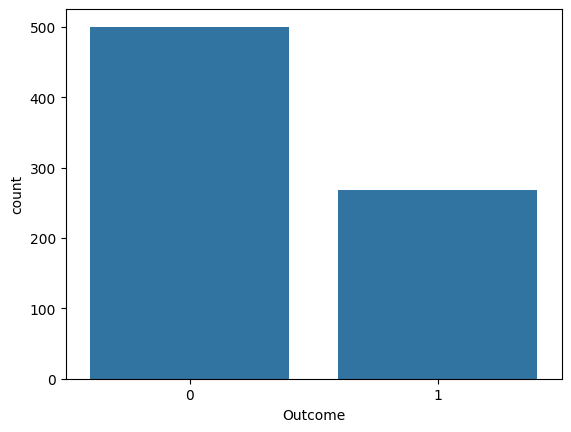

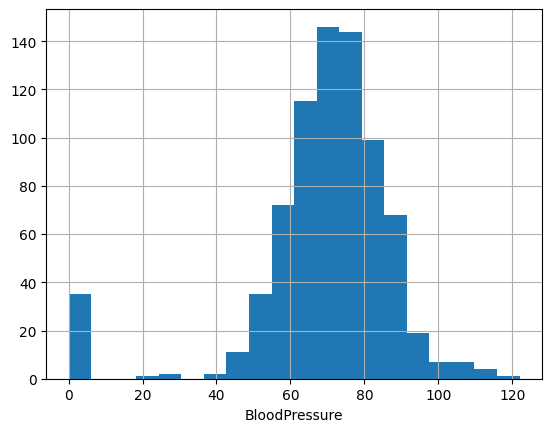

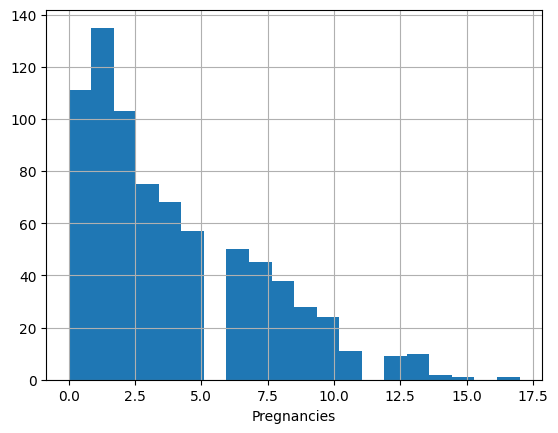

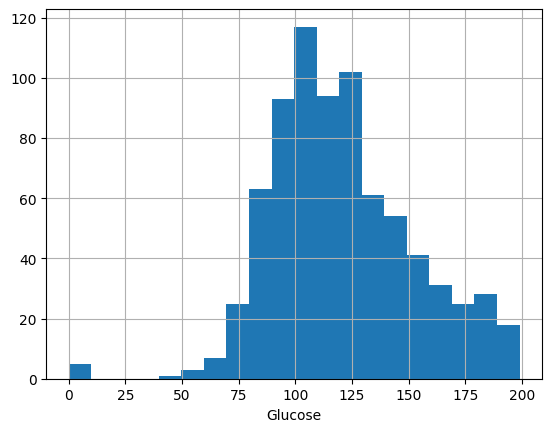

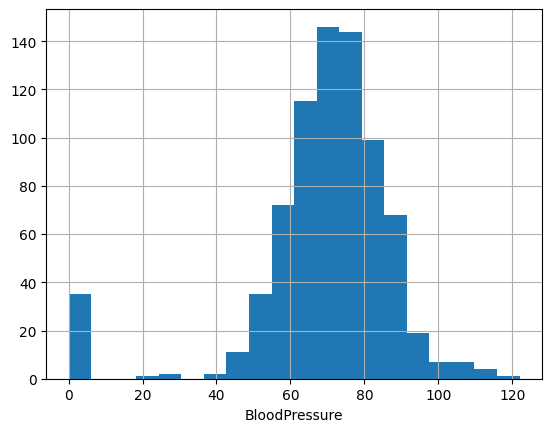

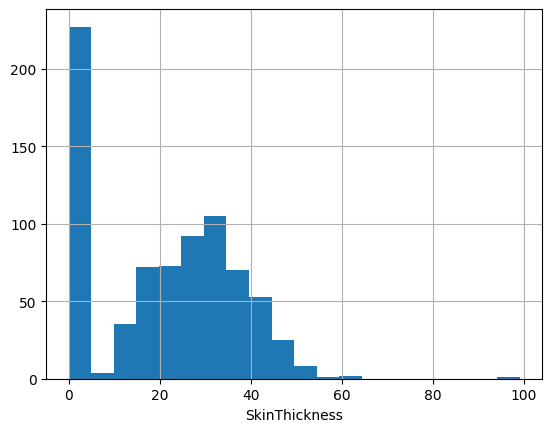

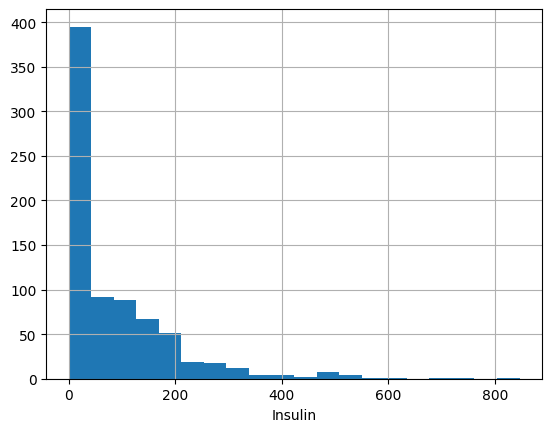

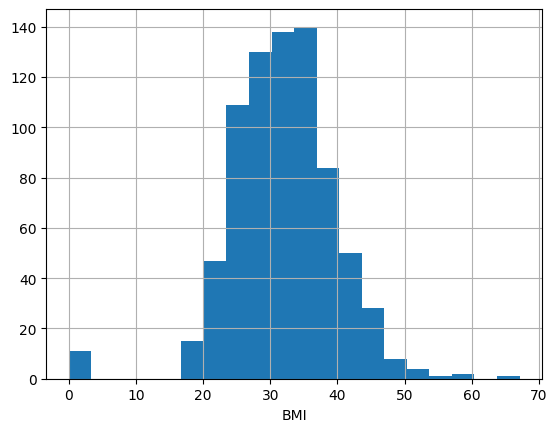

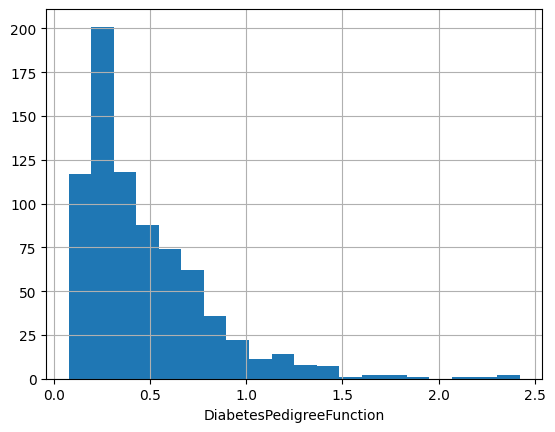

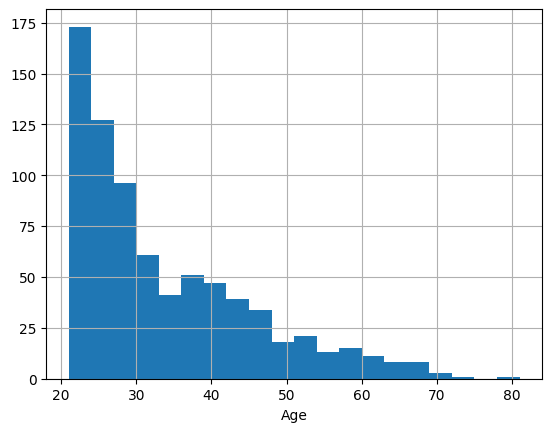

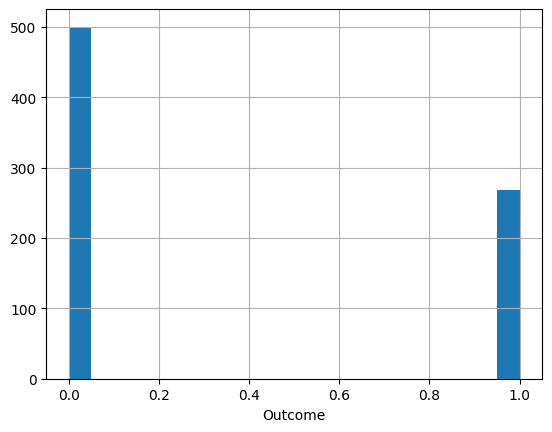

         Pregnancies
Outcome             
0              3.298
1              4.866


         Glucose
Outcome         
0        109.980
1        141.257


         BloodPressure
Outcome               
0               68.184
1               70.825


         SkinThickness
Outcome               
0               19.664
1               22.164


         Insulin
Outcome         
0         68.792
1        100.336


           BMI
Outcome       
0       30.304
1       35.143


         DiabetesPedigreeFunction
Outcome                          
0                           0.430
1                           0.550


           Age
Outcome       
0       31.190
1       37.067


Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin True
BMI False
DiabetesPedigreeFunction False
Age False


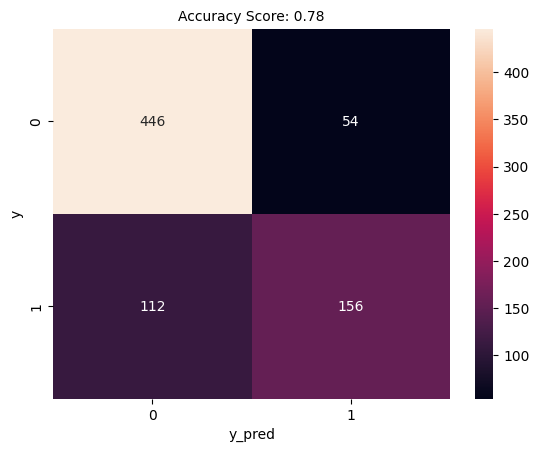

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.74      0.58      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.74      0.75       768
weighted avg       0.78      0.78      0.78       768

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        97
           1       0.79      0.53      0.63        57

    accuracy                           0.77       154
   macro avg       0.78      0.72      0.73       154
weighted avg       0.78      0.77      0.76       154



array([1])

In [ ]:
# LOGISTIC REGRESSION


######################################################
# Diabetes Prediction with Logistic Regression
######################################################

# İş Problemi:

# Özellikleri belirtildiğinde kişilerin diyabet hastası olup
# olmadıklarını tahmin edebilecek bir makine öğrenmesi
# modeli geliştirebilir misiniz?

# Veri seti ABD'deki Ulusal Diyabet-Sindirim-Böbrek Hastalıkları Enstitüleri'nde tutulan büyük veri setinin
# parçasıdır. ABD'deki Arizona Eyaleti'nin en büyük 5. şehri olan Phoenix şehrinde yaşayan 21 yaş ve üzerinde olan
# Pima Indian kadınları üzerinde yapılan diyabet araştırması için kullanılan verilerdir. 768 gözlem ve 8 sayısal
# bağımsız değişkenden oluşmaktadır. Hedef değişken "outcome" olarak belirtilmiş olup; 1 diyabet test sonucunun
# pozitif oluşunu, 0 ise negatif oluşunu belirtmektedir.

# Değişkenler
# Pregnancies: Hamilelik sayısı
# Glucose: Glikoz.
# BloodPressure: Kan basıncı.
# SkinThickness: Cilt Kalınlığı
# Insulin: İnsülin.
# BMI: Beden kitle indeksi.
# DiabetesPedigreeFunction: Soyumuzdaki kişilere göre diyabet olma ihtimalimizi hesaplayan bir fonksiyon.
# Age: Yaş (yıl)
# Outcome: Kişinin diyabet olup olmadığı bilgisi. Hastalığa sahip (1) ya da değil (0)


# 1. Exploratory Data Analysis
# 2. Data Preprocessing
# 3. Model & Prediction
# 4. Model Evaluation
# 5. Model Validation: Holdout
# 6. Model Validation: 10-Fold Cross Validation
# 7. Prediction for A New Observation


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

!pip install scikit-learn
#from sklearn.metrics  import plot_roc_curve

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_validate

def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)



######################################################
# Exploratory Data Analysis
######################################################

df = pd.read_csv("diabetes.csv")

##########################
# Target'ın Analizi
##########################

df["Outcome"].value_counts()

sns.countplot(x="Outcome", data=df)
plt.show()

100 * df["Outcome"].value_counts() / len(df)

##########################
# Feature'ların Analizi
##########################

df.head()

df["BloodPressure"].hist(bins=20)
plt.xlabel("BloodPressure")
plt.show()

def plot_numerical_col(dataframe, numerical_col):
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.show(block=True)


for col in df.columns:
    plot_numerical_col(df, col)

cols = [col for col in df.columns if "Outcome" not in col]


# for col in cols:
#     plot_numerical_col(df, col)

df.describe().T

##########################
# Target vs Features
##########################

df.groupby("Outcome").agg({"Pregnancies": "mean"})

def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in cols:
    target_summary_with_num(df, "Outcome", col)



######################################################
# Data Preprocessing (Veri Ön İşleme)
######################################################
df.shape
df.head()

df.isnull().sum()

df.describe().T

for col in cols:
    print(col, check_outlier(df, col))

replace_with_thresholds(df, "Insulin")

for col in cols:
    df[col] = RobustScaler().fit_transform(df[[col]])

df.head()


######################################################
# Model & Prediction
######################################################

y = df["Outcome"]

X = df.drop(["Outcome"], axis=1)

log_model = LogisticRegression().fit(X, y)

log_model.intercept_
log_model.coef_

y_pred = log_model.predict(X)

y_pred[0:10]

y[0:10]


######################################################
# Model & Prediction
######################################################

y = df["Outcome"]

X = df.drop(["Outcome"], axis=1)

log_model = LogisticRegression().fit(X, y)
log_model.intercept_
log_model.coef_

y_pred = log_model.predict(X)
y_pred[0:10]

y[0:10]


######################################################
# Model Evaluation
######################################################

def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y, y_pred)

print(classification_report(y, y_pred))


# Accuracy: 0.78
# Precision: 0.74
# Recall: 0.58
# F1-score: 0.65

# ROC AUC
y_prob = log_model.predict_proba(X)[:, 1]
roc_auc_score(y, y_prob)
# 0.83939


######################################################
# Model Validation: Holdout
######################################################

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20, random_state=17)

log_model = LogisticRegression().fit(X_train, y_train)

y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

# Accuracy: 0.78
# Precision: 0.74
# Recall: 0.58
# F1-score: 0.65

# Accuracy: 0.77
# Precision: 0.79
# Recall: 0.53
# F1-score: 0.63

#plot_roc_curve(log_model, X_test, y_test)
#plt.title('ROC Curve')
#plt.plot([0, 1], [0, 1], 'r--')
#plt.show()

# AUC
roc_auc_score(y_test, y_prob)


######################################################
# Model Validation: 10-Fold Cross Validation
######################################################

y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

log_model = LogisticRegression().fit(X, y)

cv_results = cross_validate(log_model,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])



# Accuracy: 0.78
# Precision: 0.74
# Recall: 0.58
# F1-score: 0.65

# Accuracy: 0.77
# Precision: 0.79
# Recall: 0.53
# F1-score: 0.63


cv_results['test_accuracy'].mean()
# Accuracy: 0.7721

cv_results['test_precision'].mean()
# Precision: 0.7192

cv_results['test_recall'].mean()
# Recall: 0.5747

cv_results['test_f1'].mean()
# F1-score: 0.6371

cv_results['test_roc_auc'].mean()
# AUC: 0.8327

######################################################
# Prediction for A New Observation
######################################################

X.columns

random_user = X.sample(1, random_state=45)
log_model.predict(random_user)
